In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [3]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)

Requirement already satisfied: tqdm in d:\anacondanewver\lib\site-packages (from opendatasets) (4.66.4)

Collecting kaggle (from opendatasets)

Downloading kaggle-1.6.17.tar.gz (82 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: click in d:\anacondanewver\lib\site-packages (from opendatasets) (8.1.7)

Requirement already satisfied: colorama in d:\anacondanewver\lib\site-packages (from click->opendatasets) (0.4.6)

Requirement already satisfied: six>=1.10 in d:\anacondanewver\lib\site-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi>=2023.7.22 in d:\anacondanewver\lib\site-packages (from kaggle->opendatasets) (2024.6.2)

Requirement already satisfied: python-dateutil in d:\anacondanewver\lib\site-packages (from kaggle->opendatasets) (2.9.0.post0)

Requirement already satisfied: requests in d:\anacondanewver\lib\site-packages (from kaggle->opendatasets) (2.32.2)

Requirement already satisfied: python-slugify in d:\anacondanewver\lib\site-packages (from kaggle->opendatasets) (5.0.2)

Requirement already satisfied: urllib3 in d:\anacondanewver\lib\site-packages (from kaggle->opendatasets) (2.2.2)

Requirement already satisfied: bleach in d:\anacondanewver\lib\site-packages (from kaggle->opendatasets) (4.1.0)

Requirement already satisfied: packaging in d:\anacondanewver\lib\site-packages (from bleach->kaggle->opendatasets) (23.2)

Requirement already satisfied: webencodings in d:\anacondanewver\lib\site-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in d:\anacondanewver\lib\site-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in d:\anacondanewver\lib\site-packages (from requests->kaggle->opendatasets) (2.0.4)

Requirement already satisfied: idna<4,>=2.5 in d:\anacondanewver\lib\site-packages (from requests->kaggle->opendatasets) (3.7)

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Building wheels for collected packages: kaggle

Building wheel for kaggle (setup.py): started

Building wheel for kaggle (setup.py): finished with status 'done'

Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=a3bd55b7849d6280c5c8f9d370f18a9aa3b4e743c61d525beb56144dc698f942

Stored in directory: c:\users\karishma\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983

Successfully built kaggle

Installing collected packages: kaggle, opendatasets

Successfully installed kaggle-1.6.17 opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  karishmaamanoj


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:41<00:00, 2.77MB/s] 


In [4]:
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [5]:
df.shape

(7824482, 4)

In [6]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [7]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [8]:
del df

In [9]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A2IW4QOGCKALM6,B000RZQZM0,5.0,1273622400
1,A28OBPLHOOMTI1,B00EDU4G0I,5.0,1393804800
2,AXF0OXVFU6HD3,B00CRFK24K,5.0,1392076800
3,A11IJ44H6VU1RH,B00006HMPN,5.0,1061078400
4,A31EXXZNKX5H9J,B00B2HVASG,3.0,1390176000


In [10]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [11]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [12]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012847e+00
std,1.380216e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [13]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [14]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [15]:
electronics_data.head()

,userId,productId,rating
0,A2IW4QOGCKALM6,B000RZQZM0,5.0
1,A28OBPLHOOMTI1,B00EDU4G0I,5.0
2,AXF0OXVFU6HD3,B00CRFK24K,5.0
3,A11IJ44H6VU1RH,B00006HMPN,5.0
4,A31EXXZNKX5H9J,B00B2HVASG,3.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

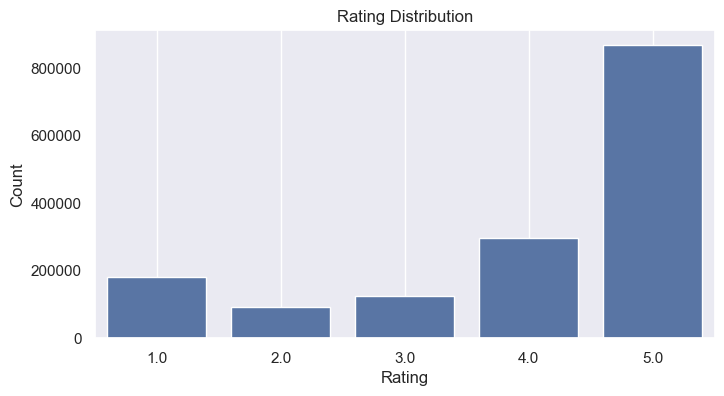

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [17]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225738
Total unique products :  237551


In [18]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
ADLVFFE4VBT8      105
A5JLAU2ARJ0BO     105
A3OXHLG6DIBRW8     99
A6FIAB28IS79       87
A680RUE1FDO8B      84
Name: rating, dtype: int64

In [19]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 27 


Popularity Based Recommendation

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [20]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [21]:
data.head()

,userId,productId,rating
0,A2IW4QOGCKALM6,B000RZQZM0,5.0
2,AXF0OXVFU6HD3,B00CRFK24K,5.0
6,AMA8QZ6766A3V,B0062IPIPQ,5.0
7,A24O066M6CV9XH,B00008NJEP,1.0
8,A2T90EISKCWYXT,B007JPCL88,5.0


In [22]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_rating_per_product.head()

productId
B0074BW614    3554
B00DR0PDNE    3416
B007WTAJTO    2771
B0019EHU8G    2561
B006GWO5WK    2497
Name: rating, dtype: int64

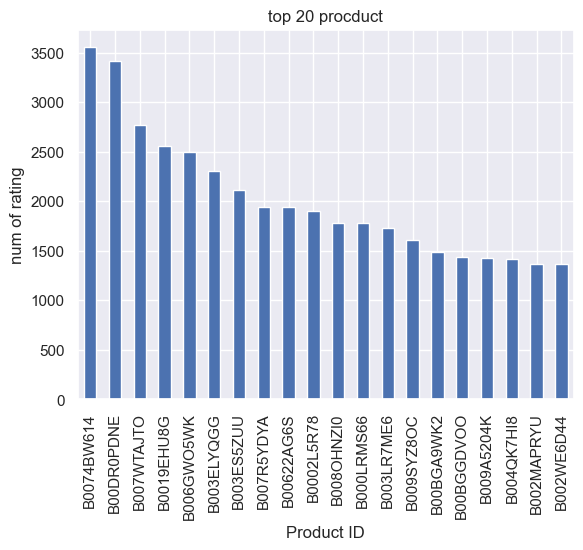

In [24]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [25]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [26]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.389744
1400532655,3.642857
140053271X,3.985915
9573212919,3.709091
B00000DM9W,4.531250


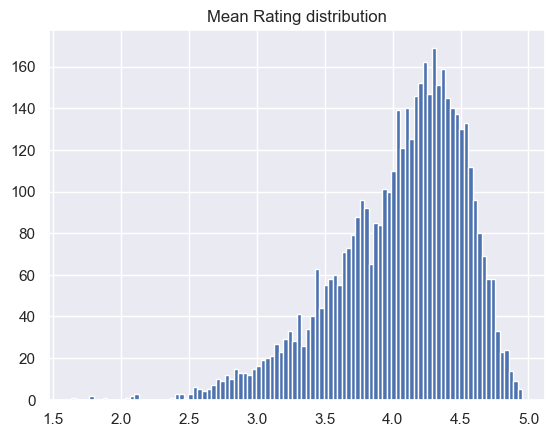

In [27]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [28]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew() #highly negatively skewed

-0.9019327152578139

In [29]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [30]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.389744,195
1400532655,3.642857,84
140053271X,3.985915,71
9573212919,3.709091,55
B00000DM9W,4.531250,64


In [31]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.489871,3554


In [32]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  139


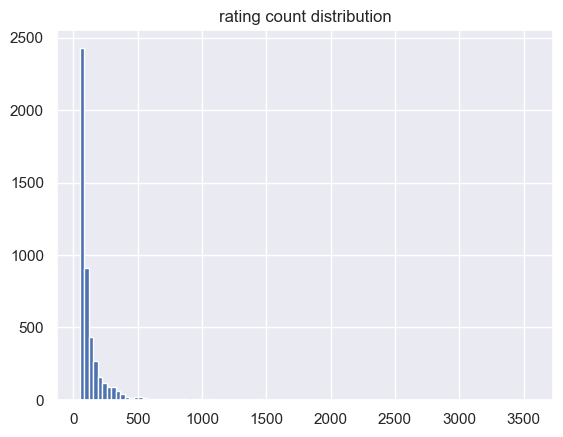

In [33]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

In [35]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11389172702486819 


Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [61]:
# Step 1: Import Required Libraries
import pandas as pd
from surprise import Dataset, Reader
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import dump

# Step 2: Load the Dataset
# Adjust the path according to where your dataset is located
file_path = 'ratings_Electronics.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Step 3: Prepare the Data
# Define the Reader object. The rating scale is typically 1-5 for this dataset.
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise
surprise_data = Dataset.load_from_df(data[['userId', 'productId', 'rating']], reader)

# Split the dataset into training and testing sets (80% train, 20% test)
trainset, testset = train_test_split(surprise_data, test_size=0.2)

# Step 4: Build the Recommendation Model
# Use KNN with means for item-item collaborative filtering
model = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False})
model.fit(trainset)

# Step 5: Make Predictions and Evaluate the Model
predictions = model.test(testset)

# Calculate and print RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

# Optional: Save the model for later use
dump.dump('item_item_model', algo=model)


ModuleNotFoundError: No module named 'surprise'

In [44]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,9573212919,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,B00001OWYM,B00001P4XA,...,B00I2ZBD1U,B00I94IPTW,B00I9K3ZQ4,B00IF70QCW,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IVPU786,B00IZBNQO8,B00J46VVKE
userId,,,,,,,,,,,,,,,,,,,,,
A0002032ZFQKDVHYKGWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A002145212T9JG4UKUQW4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01410041ZE038XXVXLBB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A015639027WKW2102QO0S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01779462MHEEWPXMZKF4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19874, 4395)

In [46]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0002032ZFQKDVHYKGWR,A002145212T9JG4UKUQW4,A01410041ZE038XXVXLBB,A015639027WKW2102QO0S,A01779462MHEEWPXMZKF4,A02247533O5ZV8QY08RNV,A027389427NLQ1FLHLQH0,A02813902S5OKR9PK9DVI,A03879251O3S88EZOEOMB,A0452118345JTIBX8LFOX,...,AZYJE40XW6MFG,AZYKIAD6MJ9UU,AZYKSZ37A2F8Q,AZYKYRYRLBYEX,AZZKYDES7PEAP,AZZLK325AH0FV,AZZMKZ6VEHLF9,AZZOQCD4U42P0,AZZQ6G2EQ08O6,AZZUJP2VVO8A5
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573212919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J1V5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19874, 4395)

In [53]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0002032ZFQKDVHYKGWR,A002145212T9JG4UKUQW4,A01410041ZE038XXVXLBB,A015639027WKW2102QO0S,A01779462MHEEWPXMZKF4,A02247533O5ZV8QY08RNV,A027389427NLQ1FLHLQH0,A02813902S5OKR9PK9DVI,A03879251O3S88EZOEOMB,A0452118345JTIBX8LFOX,...,AZYJE40XW6MFG,AZYKIAD6MJ9UU,AZYKSZ37A2F8Q,AZYKYRYRLBYEX,AZZKYDES7PEAP,AZZLK325AH0FV,AZZMKZ6VEHLF9,AZZOQCD4U42P0,AZZQ6G2EQ08O6,AZZUJP2VVO8A5
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573212919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J1V5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4395, 10)

In [55]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4395, 4395)

In [56]:
x_ratings_matrix.index[10]

'B00001P4XH'

In [57]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

11


In [58]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4395,)

In [59]:
correlation_matrix[correlation_product_ID>0.75].shape

(275, 4395)

In [60]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001OWYM',
 'B00001P4ZH',
 'B000067SOH',
 'B00008NJEP',
 'B00008OE5G',
 'B00023JJV6',
 'B0002BEQJ8',
 'B0002DG9XW',
 'B000652M6Y',
 'B00070QI1I',
 'B00077AA5Q',
 'B0007U9SOC',
 'B0007XHLXO',
 'B0009K9FZW',
 'B000CSOXTO',
 'B000E1FYQA',
 'B000EPHR0C',
 'B000FDTNZK',
 'B000GU88CQ',
 'B000H6CBA4']